## Reinhard颜色迁移算法

### Reinhard颜色迁移算法的过程很简单，流程如下，细节部分见原文，题目为color transfer between images：

- 将参考图片和目标图片转换到LAB空间下  
- 得到参考图片和目标图片的均值和标准差  
- 对目标图片的每一个像素值，减去目标图像均值然后乘上参考图片和目标图片标准差的比值，再加上参考图像均值  
- 将目标图片转换到RGB空间  
将RGB图片转换到LAB空间很重要，因为LAB空间能降低三原色之间的相关性，如果不转换，结果会有很大的不同



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

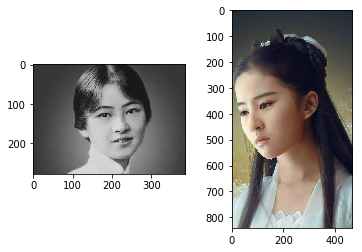

In [8]:
image = cv2.imread('./transfer/linhuiyin.jpg')
plt.subplot(1, 2, 1)
plt.imshow(image[:,:,[2,1,0]])
image = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

original = cv2.imread('./transfer/liuyifei.jpg')
plt.subplot(1, 2, 2)
plt.imshow(original[:,:,[2,1,0]])
original = cv2.cvtColor(original,cv2.COLOR_BGR2LAB)

In [9]:
# 得到均值和标准差
def getavgstd(image):
    avg = []
    std = []
    image_avg_l = np.mean(image[:,:,0])
    image_std_l = np.std(image[:,:,0])
    image_avg_a = np.mean(image[:,:,1])
    image_std_a = np.std(image[:,:,1])
    image_avg_b = np.mean(image[:,:,2])
    image_std_b = np.std(image[:,:,2])
    avg.append(image_avg_l)
    avg.append(image_avg_a)
    avg.append(image_avg_b)
    std.append(image_std_l)
    std.append(image_std_a)
    std.append(image_std_b)
    return (avg,std)

In [10]:
image_avg,image_std = getavgstd(image)
original_avg,original_std = getavgstd(original)

height,width,channel = image.shape
for i in range(0,height):
    for j in range(0,width):
        for k in range(0,channel):
            t = image[i,j,k]
            t = (t-image_avg[k])*(original_std[k]/image_std[k]) + original_avg[k]
            t = 0 if t<0 else t
            t = 255 if t>255 else t
            image[i,j,k] = t
image = cv2.cvtColor(image,cv2.COLOR_LAB2BGR)
cv2.imwrite('./transfer/out.jpg',image)

True

In [11]:
image.shape

(278, 387, 3)

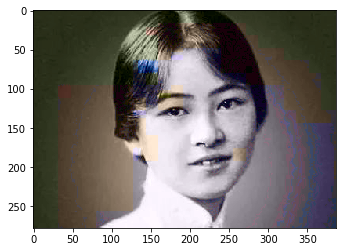

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image[:,:,[2,1,0]])